# ML в Биологии
## 3. Введение в сверточные нейронные сети

## Сверточные сети

В этой домашней работе вам предстоит построить сверточную сеть для классификации изображений.

#### Биология
Необходимо классифицировать изображения МРТ головного мозга из датасета [**"Brain Tumor Classification (MRI)"**](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri) и определить вид опухоли.

#### Физика
Необходимо классифицировать изображения солнечного затмения из датасета [**"Solar Eclipse Classification"**](https://www.kaggle.com/datasets/tshr147/solar-eclipse-classification) по степени: частичное, полное и кольцевое.

### Задача 1.

**Пожалуйста, ПРОЧИТАЙТЕ ВНИМАТЕЛЬНО то, что написано ниже, там изложены требования к вашей работе и полезные советы!**


**Требование к работе**

* **Запрещено** использовать предобученные нейросети.

* **Запрещено** использовать тестовые данные где-либо за исключением вычисления финальной оценки качества. Подсказка &mdash; распределение данных на тесте такое же как в тестовых данных.


### Советы

#### Архитектура нейросети
* В отличие от семинара в данном датасете могут встретиться картинки разных размеров. Эту проблему можно решить двумя способами:
  - Используя `torchvision.transforms.Resize` можно привести картинки к единому размеру. Если вы решите использовать этот способ, стоит посмотреть, какого в принципе размера встречаются картинки, чтобы не сжать их слишком сильно. Для картинок одного размера можно обучить бейзлайн в виде полносвязной сети.
  - Учесть переменный размер картинки в архитектуре сети. Общий принцип здесь такой: можно использовать свертки с нужным `padding`, чтобы не иметь проблем из-за уменьшения размеров картинки из-за сверток, последовательно применяя сверточные слои и пуллинги, нужно увеличивать количество каналов одновременно с уменьшением размера картинок (из-за пуллинга), а в конце, получив картинку размера (n_channels, nx, ny), оставить вектор размера (n_channels) (n_channels будет одинаковым для всех картинок, поскольку зависит от архитектуры сети!). Сделать это можно усреднением по пространственным картам [torch.nn.AdaptiveAvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html).
* Попробуйте разные размеры фильтров, страйдинг, паддинг
* Также можно попробовать разные активации: `tanh`, `leaky relu` и другие.

#### Процесс обучения
* Воспользуйтесь GPU google colab или любой другой GPU, которая у вас есть.
* Для сокращения вычислительной сложности можно поэксперементировать с параметром `stride`. Кроме того можете попробовать разные виды Poooling-ов.
* Помните, что некоторым нейросетям требуется $10$ эпох, чтобы сойтись, а некоторым – $500$. Большие нейросети дольше обучаются.
* Если вы достигли какого-то порога на валидации лучше подождать примерно 10 эпох перед тем как останавливать обучение.

#### И главное:
* Рисуйте кривые обучения: loss и метрика качества (лучше использовать F1-меру) для обучения и валидации.

In [ ]:
!pip install lightning
!pip install tensorboard
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.0/563.0 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install torchmetrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import torch
from torch import nn
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score
from sklearn.utils.random import sample_without_replacement
from IPython.display import Image, clear_output
from collections import defaultdict
from torch.optim import lr_scheduler
from matplotlib.animation import FuncAnimation, ImageMagickFileWriter
import time

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import lightning.pytorch as pl
from torchmetrics.functional import accuracy
from lightning.pytorch import loggers as pl_loggers
from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping

from torchmetrics import F1Score

%matplotlib inline

### Для Google Colab
Чтобы не грузить данные каждый раз в колаб при его отключении, а данные сюда грузятся небыстро, будет лучше всего поступить следующим образом.
* Загрузите архив на диск.
* Примонтируйте ваш диск к данному ноутбуку с помощью кода ниже


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* В панели слева ("Файлы") откройте папку `drive/MyDrive/..` и найдите архив с файлом на диске
* Кликните по файлу и нажмите на кнопку "Скопировать путь"

Теперь вы можете обратиться к данным, используя скопированный путь

In [ ]:
# Путь до диска (для напоминания)
DISK_PATH = "drive/MyDrive"
# Путь до архива с данными (пример)
ZIP_PATH = "/content/drive/MyDrive/archive.zip"
# Путь для папки с данными
DATA_PATH = "/content/data"

* Разархивируйете данные на диске.

In [ ]:
! unzip $ZIP_PATH -d  $DATA_PATH

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/data/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(2).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(20).jpg  
  inflating: /content/data/Testing/glioma_tumor/image(21).jp

В папке `DATA_PATH` теперь хранится папка с тренировочными данными (у биологов - `Training`, у физиков - `Train`) и тестовыми (у биологов - `Testing`, у физиков - `Test`). В папку с тестовыми данными не подглядывать :)

In [ ]:
! ls $DATA_PATH

Testing  Training


### Подготовка датасетов

### Биология
В `train` датасете $4$ вида опухолей (или их отсутсвия) и $2870$ изображений МРТ головного мозга (объектов). Посмотрим на какую-нибудь картину из набора данных.

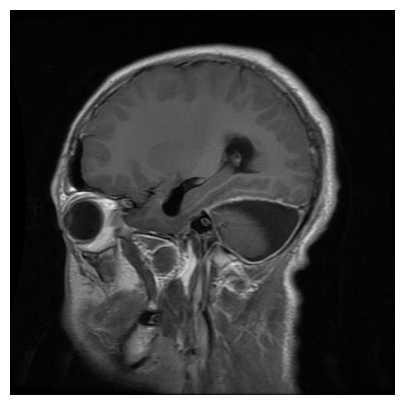

In [ ]:
path_to_img = os.path.join(DATA_PATH, "Training/glioma_tumor/gg (40).jpg")
image = plt.imread(path_to_img)
plt.figure(figsize=(12, 5))
plt.imshow(image)
plt.axis("off");

Разобьем `train` выборку на `train` и `val`:



In [ ]:
# Папка со всеми МРТ изображениями / папка с изображениями для тренировки
TRAIN_DIR = os.path.join(DATA_PATH, "Training")
# Считываем названия директорий, которые и являются видом опухоли
TUMOR_LIST = {i:name for i, name in enumerate(os.listdir(TRAIN_DIR))}


# Папка с изображениями для валидации
VAL_DIR = os.path.join(DATA_PATH, "val")
os.makedirs(VAL_DIR, exist_ok=True)

# Папка с изображениями для теста
TEST_DIR = os.path.join(DATA_PATH, "Testing")


# Доля изображений в валидации
VAL_FRAC = 0.3


# Создаем директорию с валидационной выборкой для каждого вида опухоли.
for tumor in TUMOR_LIST.values():
    os.makedirs(os.path.join(VAL_DIR, tumor), exist_ok=True)

    # Считываем выборку изображений.
    tumor_path = os.path.join(TRAIN_DIR, tumor)

    # Сортируем изображения для детерминированнсти
    images_filename = sorted(os.listdir(tumor_path))

    # Выделяем часть изображений для валидации
    # Выбираем случайные изображения из выборки для валидции, с установленным random_state
    num_images = len(images_filename)
    num_val = int(num_images * VAL_FRAC)
    indices = sample_without_replacement(num_images, num_val, random_state=42)
    val_images = np.take(images_filename, indices)

    print(f'{tumor} | train images = {num_images - num_val} | val images = {num_val}')

    # Сохраняем валидационную выборку
    for image_filename in val_images:
        source = os.path.join(TRAIN_DIR, tumor, image_filename)
        destination = os.path.join(VAL_DIR, tumor, image_filename)
        shutil.copy(source, destination)
        os.remove(source)

glioma_tumor | train images = 579 | val images = 247
no_tumor | train images = 277 | val images = 118
pituitary_tumor | train images = 579 | val images = 248
meningioma_tumor | train images = 576 | val images = 246


Данный датасет не очень сбалансирован по классам, возможные пути решения:
* *random oversampling* – включаем несколько копий объектов меньших классов, увеличивая их до размера большего класса, к копиям можно применять аугментацию;
* *random undersampling* – не включаем часть объектов больших классов в обучающую выборку;
* *примение весов* к лосс-функции;
* ...

Предлагаем вам сначала попробовать использовать обучить модель без решения проблемы несбалансированности (а вдруг и так все заработает?), а затем самим выбрать способ борьбы с ним и написать код в случае необходимости.

Определим минмальный размер фотографии в датасете и приведем все отографии к нему:

In [ ]:
from PIL import Image

sizes = []
for tumor in TUMOR_LIST.values():
    tumor_path = os.path.join(TRAIN_DIR, tumor)
    for img_file in os.listdir(tumor_path):
        img = Image.open(os.path.join(tumor_path, img_file))
        sizes.append(img.size)

min_size = min(sizes, key=lambda x: x[0] * x[1])
print("Минимальный размер:", min_size)

Минимальный размер: (201, 207)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((201, 207)),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(VAL_DIR, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(TEST_DIR, transform=transform)

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=False, shuffle=False)

Теперь напишем простенькую полносвязную нейронную сеть (возьмем из семинара):

In [ ]:
class MySimpleModel(nn.Module):
    def __init__(self, n_classes=5):
        '''
        Здесь объявляем все слои, которые будем использовать
        '''

        super(MySimpleModel, self).__init__()
        self.linear1 = nn.Linear(3 * 201 * 207, 256)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(128, 5)

    def forward(self, x):
        '''
        Здесь пишем в коде, в каком порядке какой слой будет применяться
        '''

        x = nn.Flatten()(x)
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        x = self.linear3(x)

        return x

Пропишем лайтнинг:

In [ ]:
device = f"cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
print(device)

cuda


In [ ]:
class MySimpleModelLightning(pl.LightningModule):
    def __init__(self, lr=0.001, n_classes=5, model_=MySimpleModel()):
        super().__init__()

        self.model = model_
        self.criterion = nn.CrossEntropyLoss()
        self.lr = lr
        self.f1_score = F1Score(num_classes=n_classes, average='macro', task='multiclass')  # Используем F1-меру
        self.save_hyperparameters()  # Сохраняем гиперпараметры

    def forward(self, x):
        '''Forward pass'''
        return self.model(x)

    def training_step(self, batch, batch_idx):
        '''Возвращает лосс и метрику для одного шага обучения'''
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)

        # Рассчитываем F1-меру
        preds = torch.argmax(logits, dim=1)
        f1 = self.f1_score(preds, y)

        # Логируем лосс и F1-меру
        self.log('train_loss', loss)
        self.log('train_f1', f1)
        return loss

    def validation_step(self, batch, batch_idx):
        '''Используется для логирования метрик на валидации'''
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)

        # Рассчитываем F1-меру
        preds = torch.argmax(logits, dim=1)
        f1 = self.f1_score(preds, y)

        # Логируем лосс и F1-меру
        self.log('val_loss', loss)
        self.log('val_f1', f1)

    def test_step(self, batch, batch_idx):
        '''Используется для логирования метрик на тестировании'''
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)

        # Рассчитываем F1-меру
        preds = torch.argmax(logits, dim=1)
        f1 = self.f1_score(preds, y)

        # Логируем лосс и F1-меру
        self.log('test_loss', loss)
        self.log('test_f1', f1)

    def configure_optimizers(self):
        '''Определяем оптимизатор модели'''
        return torch.optim.Adam(self.parameters(), lr=self.lr)

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/MySimpleModel")

simple_model = MySimpleModelLightning()

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_f1', mode='max')
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss', patience=10)

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback, early_stopping],
    accelerator="gpu",
    max_epochs=30,
    log_every_n_steps=1
)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model_' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model_'])`.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model, train_loader, val_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | MySimpleModel     | 32.0 M | train
1 | criterion | CrossEntropyLoss  | 0      | train
2 | f1_score  | MulticlassF1Score | 0      | train
--------------------------------------------------------
32.0 M    Trainable params
0         Non-trainable params
32.0 M    Total params
127.952   Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | MySimpleModel     | 32.0 M | train
1 | criterion | CrossEntropyLoss  | 0      | train
2 | f1_score  | MulticlassF1Score | 0      | train
------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [1]:
#%reload_ext tensorboard
#%tensorboard --logdir=lightning_logs/

**Вывод:**

Что тут сказать… Грустно, что модель переобучилась, и дисбаланс классов действительно сказывается на результатах. Полносвязная сеть не справилась, но не стоит отчаиваться! Надеюсь, что сверточные сети покажут свои возможности.

Убедимся еще раз, что в папке train и val все разложено по папкам-классам (авторам). Эта структура папок важна для использования классов PyTorch по работе с данными (`ImageFolder` и `DataLoader`):

In [ ]:
!ls $TRAIN_DIR

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [ ]:
!ls $VAL_DIR

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


### I. Построение сверточных сетей с использованием Dropout и BatchNorm

В первой части задания вам предстоит сравнить четыре различные реализации одной и той же сверточной сети. Для реализации сети можете смело использовать код с семинара.

1. Постройте простую сверточную сеть без использования функций Dropout и BatchNorm.

In [ ]:
class SimpleConvNetNoDropout(nn.Module):
    def __init__(self):
        super(SimpleConvNetNoDropout, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.mp1 = nn.MaxPool2d(kernel_size=2)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.mp2 = nn.MaxPool2d(kernel_size=2)
        self.relu2 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(64 * 48 * 50, 512)  # Замените размер в зависимости от входного изображения
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 5)  # количество классов

    def forward(self, x):
        layer1 = self.mp1(self.relu1(self.conv1(x)))
        layer2 = self.mp2(self.relu2(self.conv2(layer1)))

        out = self.flatten(layer2)
        out = self.relu3(self.fc3(out))
        out = self.fc4(out)
        return out

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetNoDropout")

simple_model_ConvNetNoDropout = MySimpleModelLightning(model_=SimpleConvNetNoDropout())

# Создаем чекпоинтер
checkpoint_callback = ModelCheckpoint(monitor='val_f1', mode='max')
# Создаем коллбек для остановки обучения в случае отсутствия улучшений:
early_stopping = EarlyStopping('val_loss', patience=10)

trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback, early_stopping],
    accelerator="gpu",
    max_epochs=30,
    log_every_n_steps=1
)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model_' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model_'])`.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model_ConvNetNoDropout, train_loader, val_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type                   | Params | Mode 
-------------------------------------------------------------
0 | model     | SimpleConvNetNoDropout | 78.7 M | train
1 | criterion | CrossEntropyLoss       | 0      | train
2 | f1_score  | MulticlassF1Score      | 0      | train
-------------------------------------------------------------
78.7 M    Trainable params
0         Non-trainable params
78.7 M    Total params
314.663   Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type                   | Params | Mode 
-------------------------------------------------------------
0 | model     | SimpleConvNetNoDropout | 78.7 M | train
1 | criterion | CrossEntropyLoss       | 0      | train
2 | f1_score  | MulticlassF1Score      | 0 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#%reload_ext tensorboard
#%tensorboard --logdir=lightning_logs/

2. Попробуйте добавить BatchNorm на слои своей сверточной сети, не используя Dropout.

In [ ]:
class SimpleConvNetWithBatchNorm(nn.Module):
    def __init__(self):
        super(SimpleConvNetWithBatchNorm, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm после первого свертки
        self.mp1 = nn.MaxPool2d(kernel_size=2)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm после второго свертки
        self.mp2 = nn.MaxPool2d(kernel_size=2)
        self.relu2 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(64 * 48 * 50, 512)  # Убедитесь, что размер правильный
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 5)  # количество классов

    def forward(self, x):
        layer1 = self.mp1(self.relu1(self.bn1(self.conv1(x))))
        layer2 = self.mp2(self.relu2(self.bn2(self.conv2(layer1))))

        out = self.flatten(layer2)
        out = self.relu3(self.fc3(out))
        out = self.fc4(out)
        return out

In [ ]:
# Логгер для TensorBoard
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetWithBatchNorm")

# Создаем модель
simple_model_ConvNetWithBatchNorm = MySimpleModelLightning(model_=SimpleConvNetWithBatchNorm())

# Чекпоинтер и коллбек для остановки
checkpoint_callback = ModelCheckpoint(monitor='val_f1', mode='max')
early_stopping = EarlyStopping('val_loss', patience=10)

# Тренировщик
trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback, early_stopping],
    accelerator="gpu",
    max_epochs=30,
    log_every_n_steps=1
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model_ConvNetWithBatchNorm, train_loader, val_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type                       | Params | Mode 
-----------------------------------------------------------------
0 | model     | SimpleConvNetWithBatchNorm | 78.7 M | train
1 | criterion | CrossEntropyLoss           | 0      | train
2 | f1_score  | MulticlassF1Score          | 0      | train
-----------------------------------------------------------------
78.7 M    Trainable params
0         Non-trainable params
78.7 M    Total params
314.663   Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type                       | Params | Mode 
-----------------------------------------------------------------
0 | model     | SimpleConvNetWithBatchNorm | 78.7 M | train
1 | criterion | CrossEntropyLoss           | 0      | train
2 |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#%reload_ext tensorboard
#%tensorboard --logdir=lightning_logs/

3. Попробуйте добавить Dropout на слои своей сверточной сети, не используя BatchNorm.

In [ ]:
class SimpleConvNetWithDropout(nn.Module):
    def __init__(self):
        super(SimpleConvNetWithDropout, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.mp1 = nn.MaxPool2d(kernel_size=2)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Dropout после первого блока

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.mp2 = nn.MaxPool2d(kernel_size=2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)  # Dropout после второго блока

        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(64 * 48 * 50, 512)  # Убедитесь, что размер правильный
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(512, 5)  # количество классов

    def forward(self, x):
        layer1 = self.mp1(self.relu1(self.conv1(x)))
        layer1 = self.dropout1(layer1)  # Применяем Dropout после первого блока

        layer2 = self.mp2(self.relu2(self.conv2(layer1)))
        layer2 = self.dropout2(layer2)  # Применяем Dropout после второго блока

        out = self.flatten(layer2)
        out = self.relu3(self.fc3(out))
        out = self.fc4(out)
        return out

In [ ]:
# Логгер для TensorBoard
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetWithDropout")

# Создаем модель
simple_model_ConvNetWithDropout = MySimpleModelLightning(model_=SimpleConvNetWithDropout())

# Чекпоинтер и коллбек для остановки
checkpoint_callback = ModelCheckpoint(monitor='val_f1', mode='max')
early_stopping = EarlyStopping('val_loss', patience=10)

# Тренировщик
trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback, early_stopping],
    accelerator="gpu",
    max_epochs=30,
    log_every_n_steps=1
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model_ConvNetWithDropout, train_loader, val_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type                     | Params | Mode 
---------------------------------------------------------------
0 | model     | SimpleConvNetWithDropout | 78.7 M | train
1 | criterion | CrossEntropyLoss         | 0      | train
2 | f1_score  | MulticlassF1Score        | 0      | train
---------------------------------------------------------------
78.7 M    Trainable params
0         Non-trainable params
78.7 M    Total params
314.663   Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type                     | Params | Mode 
---------------------------------------------------------------
0 | model     | SimpleConvNetWithDropout | 78.7 M | train
1 | criterion | CrossEntropyLoss         | 0      | train
2 | f1_score  | Multicl

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#%reload_ext tensorboard
#%tensorboard --logdir=lightning_logs/

4. Теперь добавьте на все слои сети и Dropout, и BatchNorm.

In [ ]:
class SimpleConvNetWithDropoutAndBatchNorm(nn.Module):
    def __init__(self):
        super(SimpleConvNetWithDropoutAndBatchNorm, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm после первого свертки
        self.mp1 = nn.MaxPool2d(kernel_size=2)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Dropout после первого блока

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)  # BatchNorm после второго свертки
        self.mp2 = nn.MaxPool2d(kernel_size=2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)  # Dropout после второго блока

        self.flatten = nn.Flatten()
        self.fc3 = nn.Linear(64 * 48 * 50, 512)  # Убедитесь, что размер правильный
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)  # Dropout перед полносвязным слоем
        self.fc4 = nn.Linear(512, 5)  # количество классов

    def forward(self, x):
        layer1 = self.mp1(self.relu1(self.bn1(self.conv1(x))))
        layer1 = self.dropout1(layer1)  # Применяем Dropout после первого блока

        layer2 = self.mp2(self.relu2(self.bn2(self.conv2(layer1))))
        layer2 = self.dropout2(layer2)  # Применяем Dropout после второго блока

        out = self.flatten(layer2)
        out = self.dropout3(self.relu3(self.fc3(out)))  # Dropout перед выходным слоем
        out = self.fc4(out)
        return out

In [ ]:
tb_logger = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetWithDropoutAndBatchNorm")

# Создаем модель
simple_model_ConvNetWithDropoutAndBatchNorm = MySimpleModelLightning(model_=SimpleConvNetWithDropoutAndBatchNorm())

# Чекпоинтер и коллбек для остановки
checkpoint_callback = ModelCheckpoint(monitor='val_f1', mode='max')
early_stopping = EarlyStopping('val_loss', patience=10)

# Тренировщик
trainer = pl.Trainer(
    logger=tb_logger,
    callbacks=[checkpoint_callback, early_stopping],
    accelerator="gpu",
    max_epochs=30,
    log_every_n_steps=1
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(simple_model_ConvNetWithDropoutAndBatchNorm, train_loader, val_loader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type                                 | Params | Mode 
---------------------------------------------------------------------------
0 | model     | SimpleConvNetWithDropoutAndBatchNorm | 78.7 M | train
1 | criterion | CrossEntropyLoss                     | 0      | train
2 | f1_score  | MulticlassF1Score                    | 0      | train
---------------------------------------------------------------------------
78.7 M    Trainable params
0         Non-trainable params
78.7 M    Total params
314.663   Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type                                 | Params | Mode 
---------------------------------------------------------------------------
0 | model     | SimpleConvNetWithDropoutAnd

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


In [ ]:
#%reload_ext tensorboard
#%tensorboard --logdir=lightning_logs/

Проведите сравнение построенных сверточных сетей.

Для наглядности сравнения после обучения всех четырех сетей постройте общий график лосса и метрики качества на обучающей и валидационной выборках.

In [2]:
tb_logger_no_dropout = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetNoDropout")
tb_logger_with_bn = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetWithBatchNorm")
tb_logger_with_dropout = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetWithDropout")
tb_logger_with_dropout_bn = pl_loggers.TensorBoardLogger(save_dir="lightning_logs/SimpleConvNetWithDropoutAndBatchNorm")

#%load_ext tensorboard
#%tensorboard --logdir=lightning_logs/

NameError: name 'pl_loggers' is not defined

**Вывод**


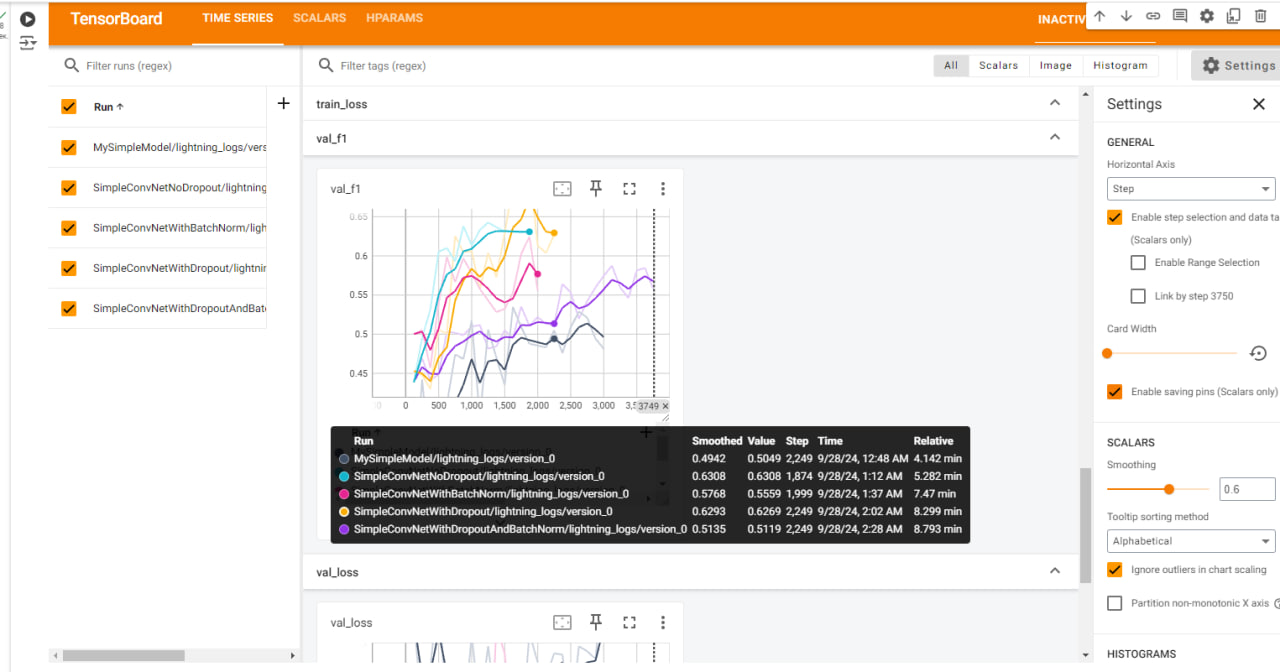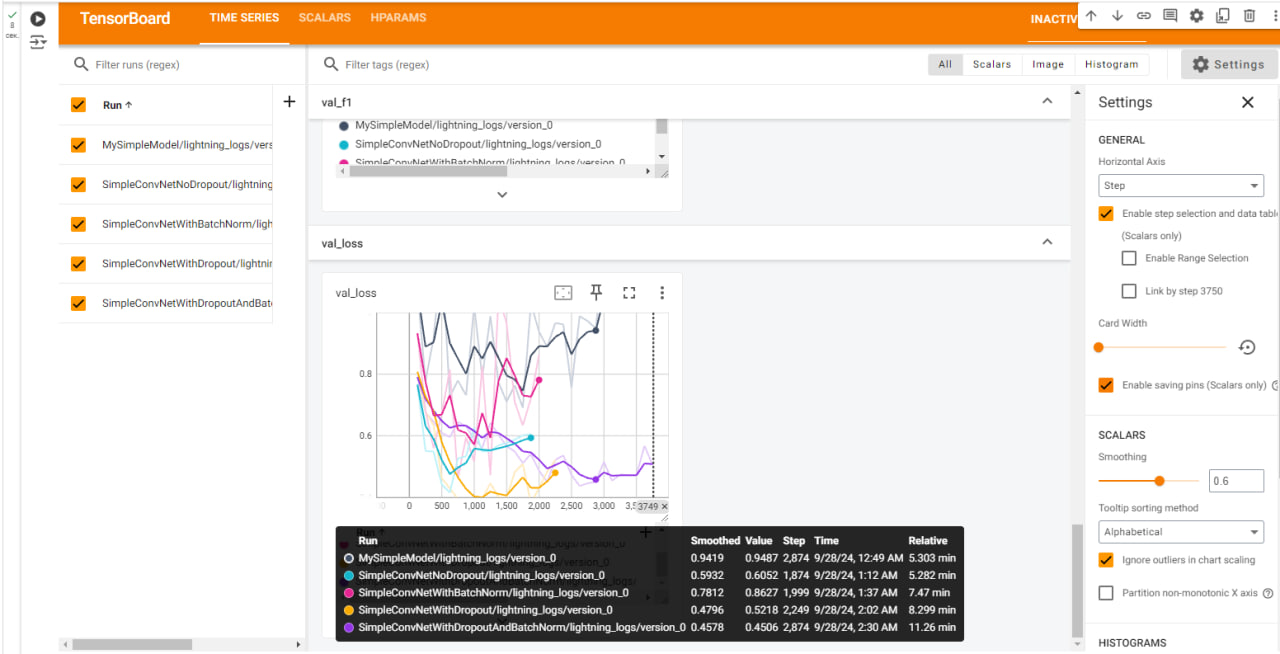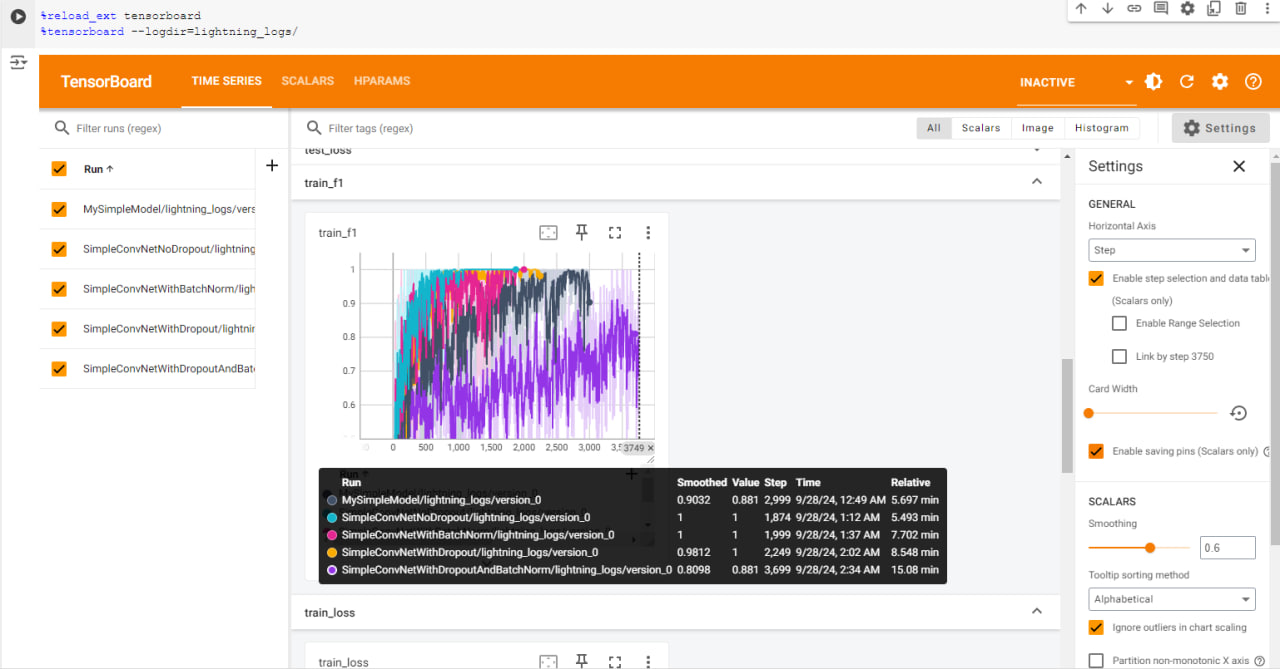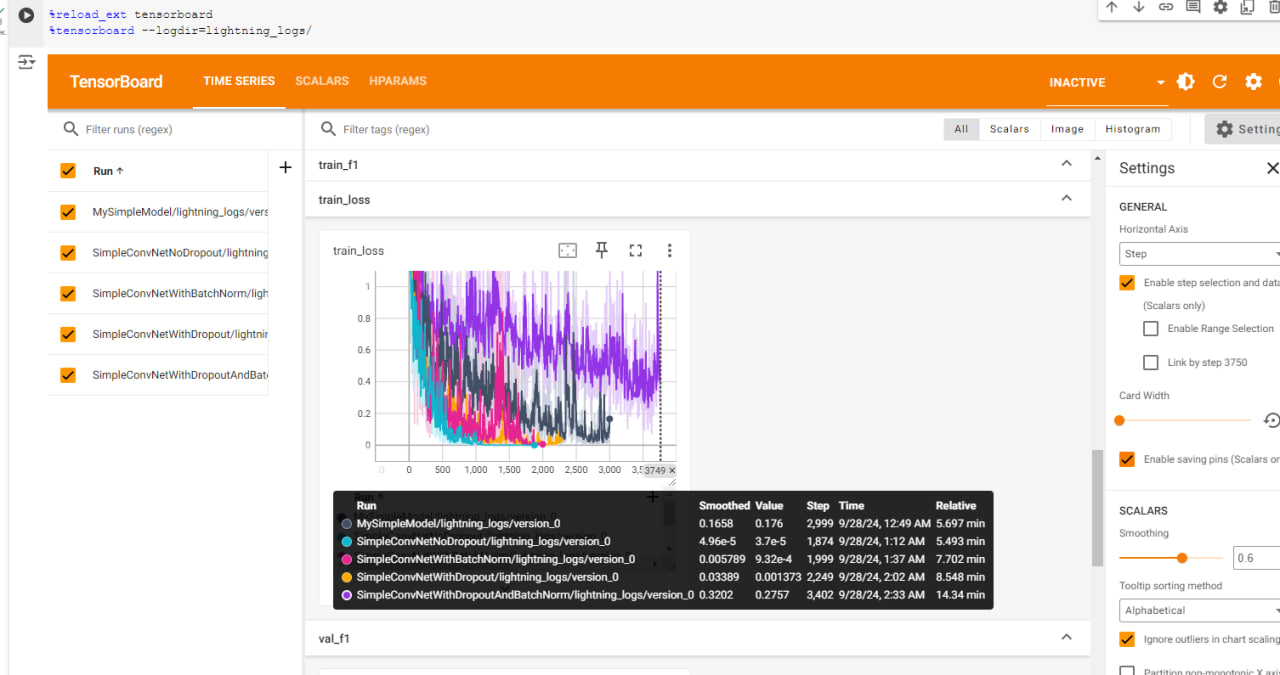

Видно, что сверточные сети лучше справляются с данной задачей. Конечно, мы не смогли достич какого-то очень крутого качества, но это явно связано с тем что мы тчательным образом не предобработали данные (в начале было сказано, то в классах есть небольшой дисбаланс).